<a href="https://colab.research.google.com/github/ppijbb/Python_Notebook/blob/main/%EC%A7%88%EB%B3%91%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 건강검진 공공데이터 활용 검진결과 예측 모델

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

!apt-get install fonts-nanum*
!apt-get install fonts-woowa-hanna

NANUM_GOTHIC = fm.FontProperties(fname='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')

fm._rebuild()

plt.rc('font', family=NANUM_GOTHIC.get_name())

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-gothic-light' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
fonts-nanum is already the newest version (20170925-1).
fonts-nanum-coding is already the newest version (2.5-1).
fonts-nanum-eco is already the newest version (1.000-6).
fonts-nanum-extra is already the newest version (20170925-1).
The following packages were automatically installed and are no longer required:
  cuda-cufft-10-1 cuda-cufft-dev-10-1 cuda-curand-10-1 cuda-curand-dev-10-1
  cuda-cusolver-10-1 cuda-cusolver-dev-10-1 cuda-cusparse-10-1
  cuda-cusparse-dev-10-1 cuda-license-10-2 cuda-npp-10-1 cuda-npp-dev-10-1
  cuda-nsight-10-1 cuda-nsight-compute-10-1 cuda-nsight-systems-10-1
  cuda-n

In [ ]:
# import libraries
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns  # plot

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm_notebook

import warnings
warnings.filterwarnings("ignore") # 경고 숨기기

from mlxtend.plotting import plot_decision_regions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
import matplotlib
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('seaborn-whitegrid')
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
def model(mod,X_tr,X_te):
    mod.fit(X_tr,y_train)
    pred = mod.predict(X_te)
    print('Model score = ',mod.score(X_te,y_test)*100,'%')

def feat_select(threshold):
    abs_cor = correlations.abs()
    features = abs_cor[abs_cor > threshold].index.tolist()
    return features    

## 케글 심혈관 질환 데이터 활용

In [ ]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/심혈관질환.csv")
df.head()
df['BMI'] = df['weight'] / (df['height']*0.01)**2
columns = ['age','gender','height','weight','BMI','ap_hi','ap_lo','cholesterol','gluc','smoke','active','cardio']
df = df[columns]
# correlations with target class
correlations = df.corr()['cardio'].drop('cardio')
print(correlations)

msk = np.random.rand(len(df))<0.85
df_train_test = df[msk]
df_val = df[~msk]

X = df_train_test.drop('cardio',axis=1)
y = df_train_test['cardio']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=70)

threshold = [0.001,0.002,0.005,0.001,0.05,0.1]
lr = LogisticRegression()

for i in threshold:
    print('\n',i)
    feature_i = feat_select(i)
    X_train_i = X_train[feature_i]
    X_test_i = X_test[feature_i]
    model(lr,X_train_i,X_test_i)


scale = StandardScaler()
scale.fit(X_train)
X_train_scaled = scale.transform(X_train)
print(X_train_scaled)
X_train_ = pd.DataFrame(X_train_scaled, columns = X.columns)
X_train_.columns

scale.fit(X_test)
X_test_scaled = scale.transform(X_test)
X_test_ = pd.DataFrame(X_test_scaled,columns=df.columns[:-1])

age            0.238159
gender         0.008109
height        -0.010821
weight         0.181660
BMI            0.165632
ap_hi          0.054475
ap_lo          0.065719
cholesterol    0.221147
gluc           0.089307
smoke         -0.015486
active        -0.035653
Name: cardio, dtype: float64

 0.001
Model score =  72.49578414839797 %

 0.002
Model score =  72.49578414839797 %

 0.005
Model score =  72.49578414839797 %

 0.001
Model score =  72.49578414839797 %

 0.05
Model score =  72.65598650927487 %

 0.1
Model score =  63.42327150084317 %
[[ 9.22194869e-01  1.36859856e+00  1.17740523e+00 ... -3.96855948e-01
  -3.10560202e-01  4.94460394e-01]
 [ 4.33809173e-01  1.36859856e+00  4.46526014e-01 ... -3.96855948e-01
  -3.10560202e-01  4.94460394e-01]
 [ 5.68453588e-02  1.36859856e+00  2.15191085e+00 ... -3.96855948e-01
  -3.10560202e-01  4.94460394e-01]
 ...
 [-5.38895728e-01 -7.30674450e-01  8.10864065e-02 ...  3.09898402e+00
  -3.10560202e-01  4.94460394e-01]
 [ 3.16766359e-03  1.368598

In [ ]:
# optimum k with optimum threshold
for i in threshold:
    feature = feat_select(i)
    X_train_k = X_train_[feature]
    X_test_k = X_test_[feature]
    err = []
    for j in range(1,30):
        knn = KNeighborsClassifier(n_neighbors=j)
        knn.fit(X_train_k,y_train)
        pred_j = knn.predict(X_test_k)
        err.append(np.mean(y_test != pred_j))


In [ ]:
feat_final = feat_select(0.05)
print(feat_final)

X_train = X_train_[feat_final]
X_test = np.asanyarray(df_val[feat_final])
y_test = np.asanyarray(df_val['cardio'])

scale.fit(X_test)
X_test_scaled = scale.transform(X_test)
X_test_ = pd.DataFrame(X_test_scaled,columns=df_val[feat_final].columns)

['age', 'weight', 'BMI', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc']


In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

random_forest = GridSearchCV(estimator=RandomForestClassifier(criterion='gini', max_depth=7), param_grid={'n_estimators': [100, 300]}, cv=5).fit(X_train, y_train)
random_forest.fit(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
print('train : ',acc_random_forest,random_forest.best_params_)

train :  73.65 {'n_estimators': 100}


In [ ]:
acc_random_forest = round(random_forest.score(X_test_, y_test) * 100, 2)
print('test : ',acc_random_forest,random_forest.best_params_)

test :  73.03 {'n_estimators': 100}


In [ ]:
samdata= pd.read_csv('data.csv',encoding='utf-8')
samdata = samdata.drop(['Unnamed: 0'], axis = 1)
samdata.columns

Index(['성별코드', '시도코드', '신장(5Cm단위)', '체중(5Kg단위)', '허리둘레', '수축기혈압', '이완기혈압',
       '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소',
       '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태', '나이',
       'BMI', '총콜레스테롤분위', '대사증후군'],
      dtype='object')

In [ ]:
def cole(i,df):
  if df.loc[i,'식전혈당(공복혈당)'] < 100:
    df.loc[i,'공복혈당분위'] = 1
  elif df.loc[i,'식전혈당(공복혈당)'] >=100 and df.loc[i,'식전혈당(공복혈당)'] <= 126:
    df.loc[i,'공복혈당분위'] = 2
  elif df.loc[i,'식전혈당(공복혈당)'] >= 126:
    df.loc[i,'공복혈당분위'] = 3

In [ ]:
total = tqdm_notebook(range(len(samdata))) 
for i in total:
  cole(i,samdata)

0    59634
1    31021
Name: 예측, dtype: int64


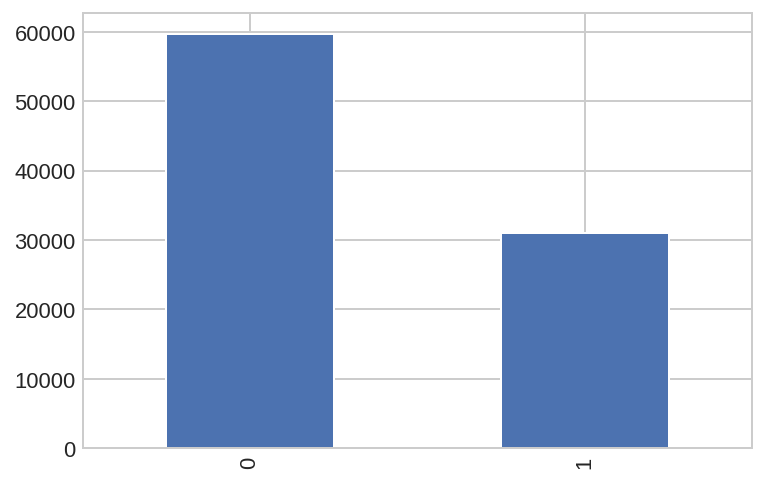

In [ ]:
data = samdata[['나이','체중(5Kg단위)','BMI','수축기혈압','이완기혈압','총콜레스테롤분위','공복혈당분위']].copy(deep=True)
data['나이'] = data['나이']*365
data.describe()
data.fillna(data.median(), inplace = True)
X_val = np.asanyarray(data)
X_train_scaled = scale.transform(X_val)
pred = random_forest.predict(X_train_scaled)
pred = pd.DataFrame(pred,columns=['예측'])
pred['심혈관X'] = np.round(random_forest.predict_proba(X_train_scaled),4)[:,0]
pred['심혈관O'] = np.round(random_forest.predict_proba(X_train_scaled),4)[:,1]
print(pred.예측.value_counts())
p=pred.예측.value_counts().plot(kind="bar")

In [ ]:
samdata[['심혈관질환예측','심혈관X','심혈관O']]  = pred[['예측','심혈관X','심혈관O']]

## 케글 당뇨병 데이터 활용


Max train score 100.0 % and k = [1]
Max test score 76.953125 % and k = [35, 43]
Best Score:0.7760416666666666
Best Parameters: {'n_neighbors': 34}


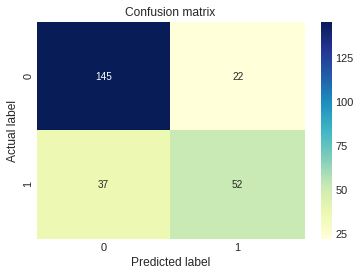

In [ ]:
#Loading the dataset
diabetes_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/피마_인디안_당뇨병발생여부.csv',encoding='utf-8')

diabetes_data_copy = diabetes_data.drop(['Pregnancies','SkinThickness','Insulin','DiabetesPedigreeFunction'],axis =1).copy(deep = True)
diabetes_data_copy[['Glucose','BloodPressure','BMI']] = diabetes_data_copy[['Glucose','BloodPressure','BMI']].replace(0,np.NaN)

diabetes_data_copy['Glucose'].fillna(diabetes_data_copy['Glucose'].mean(), inplace = True)
diabetes_data_copy['BloodPressure'].fillna(diabetes_data_copy['BloodPressure'].mean(), inplace = True)
diabetes_data_copy['BMI'].fillna(diabetes_data_copy['BMI'].median(), inplace = True)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(diabetes_data_copy.drop(["Outcome"],axis = 1),),
        columns=['Glucose', 'BloodPressure','BMI', 'Age'])

y = diabetes_data_copy.Outcome

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,50):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

knn = KNeighborsClassifier(43)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

y_pred = knn.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))



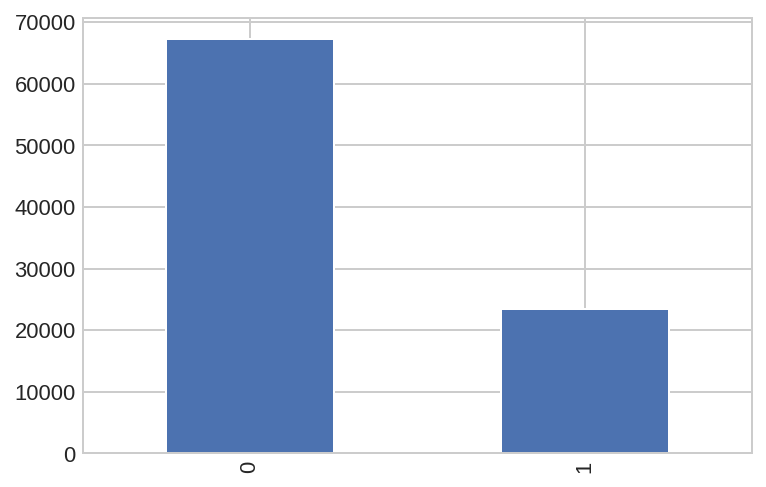

In [ ]:
samdata['혈압'] = (samdata['수축기혈압']+samdata['이완기혈압']) /2

traindata = samdata[['식전혈당(공복혈당)','혈압','BMI','나이']].copy(deep=True)

traindata['식전혈당(공복혈당)'].fillna(traindata['식전혈당(공복혈당)'].mean(), inplace = True)
traindata['혈압'].fillna(traindata['혈압'].mean(), inplace = True)
traindata['BMI'].fillna(traindata['BMI'].median(), inplace = True)

sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(traindata,),
        columns=['식전혈당(공복혈당)', '혈압','BMI', '나이']) 

traindata['당뇨예측'] = knn_cv.predict(X)
traindata['당뇨O'] = np.round(knn_cv.predict_proba(X),4)[:,0]
traindata['당뇨X'] = np.round(knn_cv.predict_proba(X),4)[:,1]

samdata[['당뇨병예측값','당뇨O','당뇨X']]=traindata[['당뇨예측','당뇨O','당뇨X']]

p=traindata.당뇨예측.value_counts().plot(kind="bar")

In [ ]:
samdata = samdata.drop(['시도코드','HDL콜레스테롤','LDL콜레스테롤','혈색소','요단백','혈청크레아티닌','(혈청지오티)AST','(혈청지오티)ALT','감마지티피','흡연상태'],axis =1 )

In [ ]:
samdata.to_csv("검진16_예측확률.csv",encoding='utf-8_sig')

In [ ]:
samdata.to_csv("/content/drive/My Drive/Colab Notebooks/예측데이터.csv",encoding='utf-8_sig')

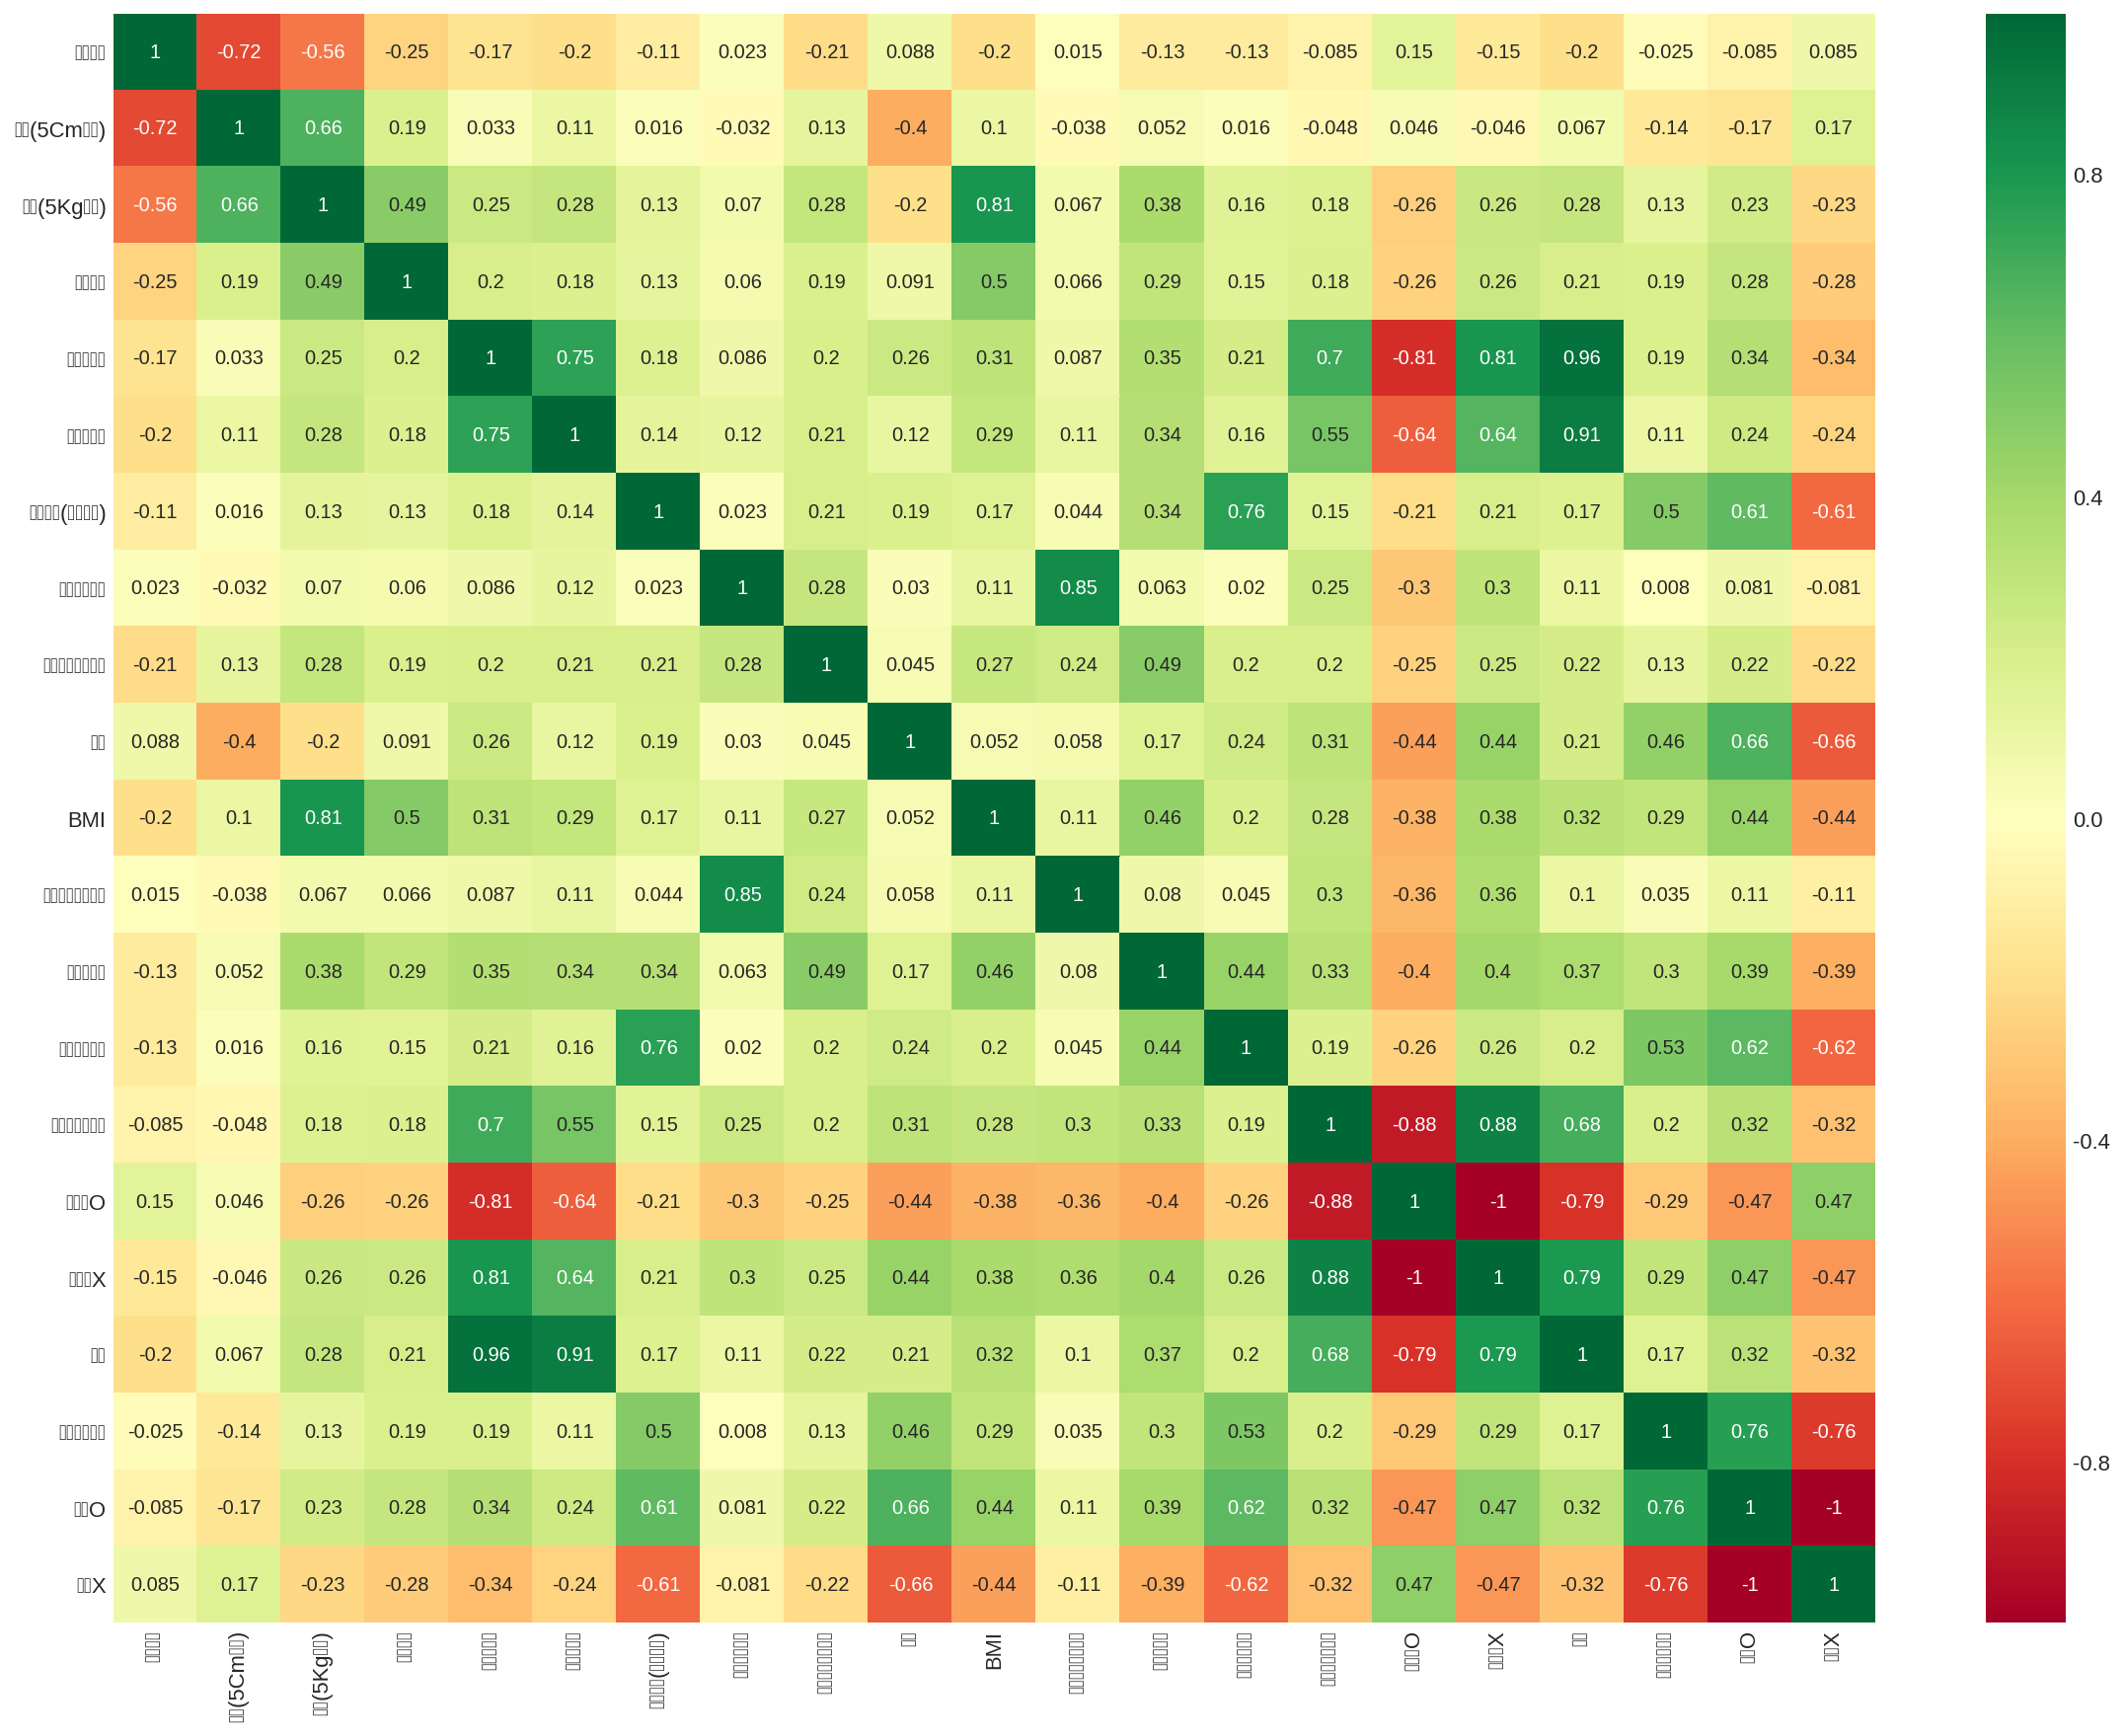

In [ ]:
plt.figure(figsize=(20,15))
p=sns.heatmap(preddata.corr(), annot=True,cmap ='RdYlGn')

In [ ]:
preddata = pd.read_csv("/content/drive/My Drive/Colab Notebooks/예측데이터.csv",encoding='utf-8').drop(['Unnamed: 0'],axis=1)
preddata.iloc[:,-12:]#.head()

,나이,BMI,총콜레스테롤분위,대사증후군,공복혈당분위,심혈관질환예측,심혈관O,심혈관X,혈압,당뇨병예측값,당뇨O,당뇨X
0,43,24.489796,3.0,2.0,1.0,1,0.1676,0.8324,115.0,0,0.3529,0.6471
1,48,25.390625,1.0,3.0,2.0,1,0.2463,0.7537,109.0,0,0.4412,0.5588
2,48,24.444444,3.0,2.0,1.0,1,0.1842,0.8158,113.0,0,0.3824,0.6176
3,53,22.857143,1.0,1.0,1.0,0,0.7248,0.2752,100.0,1,0.5294,0.4706
4,23,19.531250,2.0,1.0,1.0,0,0.7980,0.2020,94.5,0,0.0294,0.9706
...,...,...,...,...,...,...,...,...,...,...,...,...
90650,23,25.951557,1.0,2.0,1.0,1,0.3255,0.6745,111.0,0,0.1765,0.8235
90651,23,23.875115,1.0,2.0,1.0,0,0.8444,0.1556,95.0,0,0.2647,0.7353
90652,28,24.691358,1.0,1.0,2.0,0,0.7598,0.2402,99.0,0,0.3235,0.6765
90653,28,25.711662,2.0,2.0,2.0,0,0.5106,0.4894,108.5,0,0.2059,0.7941


In [ ]:
newdata = pd.read_csv('/content/mydataF.csv',encoding='utf-8')
cole(0,newdata)
data = newdata[['나이','체중(5Kg단위)','BMI','수축기혈압','이완기혈압','총콜레스테롤분위','공복혈당분위']].copy(deep=True)
data['나이'] = data['나이']*365
data.describe()
data.fillna(data.median(), inplace = True)
X_val = np.asanyarray(data)
X_train_scaled = scale.transform(X_val)
newdata['심혈관예측'] = random_forest.predict(X_train_scaled)
newdata['심혈관X'] = np.round(random_forest.predict_proba(X_train_scaled),4)[:,0]
newdata['심혈관O'] = np.round(random_forest.predict_proba(X_train_scaled),4)[:,1]

newdata['혈압'] = (newdata['수축기혈압']+newdata['이완기혈압']) /2
traindata = newdata[['식전혈당(공복혈당)','혈압','BMI','나이']].copy(deep=True)
traindata['식전혈당(공복혈당)'].fillna(traindata['식전혈당(공복혈당)'].mean(), inplace = True)
traindata['혈압'].fillna(traindata['혈압'].mean(), inplace = True)
traindata['BMI'].fillna(traindata['BMI'].median(), inplace = True)
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(traindata,),
        columns=['식전혈당(공복혈당)', '혈압','BMI', '나이']) 

newdata['당뇨예측'] = knn_cv.predict(X)
newdata['당뇨X'] = np.round(knn_cv.predict_proba(X),4)[:,0]
newdata['당뇨O'] = np.round(knn_cv.predict_proba(X),4)[:,1]

newdata.iloc[:,-10:].head()

,BMI,대사증후군,공복혈당분위,심혈관예측,심혈관X,심혈관O,혈압,당뇨예측,당뇨X,당뇨O
0,28.32658,1.0,1.0,0,0.6894,0.3106,98.5,0,0.5882,0.4118
